# **Task: 2**

#**Use KMean Clustring to classify the customers of Mall Basis on Spendings:**

# **Import Libraries:**

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as plt


##  **Import File:**





In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# **Data Cleaning:**

In [ ]:
df=df.drop(columns='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


#**Label the Gender:**

In [ ]:

df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# **Define Input and Output Features:**

In [ ]:
x=df.drop(columns='Spending Score (1-100)')
x.head(10)

,Gender,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17
5,0,22,17
6,0,35,18
7,0,23,18
8,1,64,19
9,0,30,19


In [ ]:
y= df[['Spending Score (1-100)']]
y.head(10)

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
5,76
6,6
7,94
8,3
9,72


# **Input Visualization:**

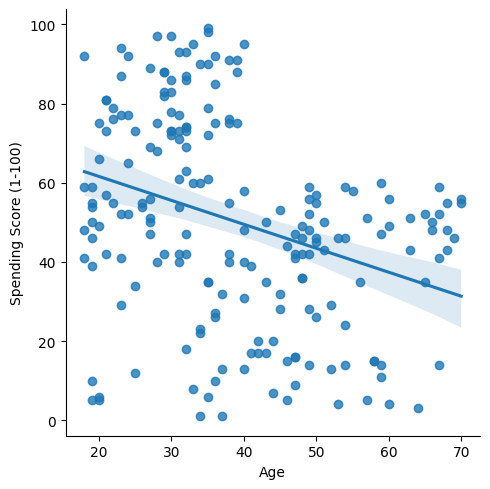

In [ ]:
import seaborn as sns
sns.lmplot(x='Age',y='Spending Score (1-100)',data=df)



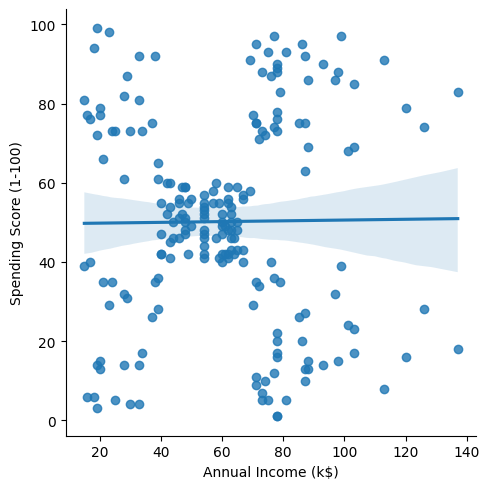

In [ ]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)' ,data=df)

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int8 
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), int8(1)
memory usage: 5.0 KB


In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **Find Elbow Point:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[176158.06,
 87170.74887218044,
 59535.81464767616,
 39578.48772507481,
 31710.874084332358,
 25447.38171106638,
 21819.117981637093,
 19081.39952102673,
 16427.111902854962]

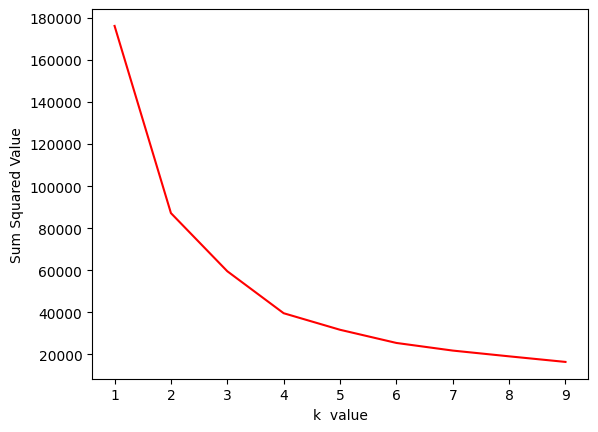

In [ ]:
import matplotlib.pyplot as plt
kr = range(1, 10)
sse = []

for k in kr:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)


plt.xlabel("k  value")
plt.ylabel("Sum Squared Value")
plt.plot(kr,sse,color='red')
sse

# **Centroids Points:**

In [ ]:
k.cluster_centers_

array([[  0.5       ,  55.81481481,  51.77777778],
       [  0.34693878,  30.34693878,  29.26530612],
       [  0.41666667,  39.        , 106.5       ],
       [  0.46575342,  31.95890411,  72.95890411]])

# **Fitting Model and Visulization:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


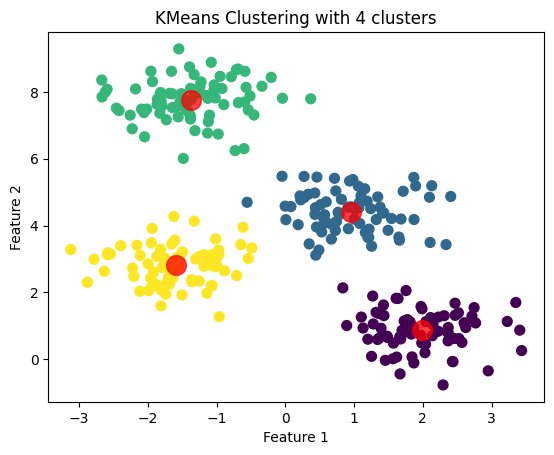

In [ ]:

from sklearn.datasets import make_blobs


# Generate random data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 4 clusters')
plt.show()


# **3D Visualiztion:**

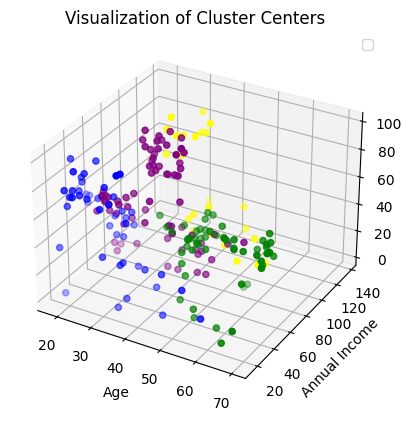

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0 , 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)


kplot.scatter3D( df1['Age'], df1['Annual Income (k$)'],df1['Spending Score (1-100)']  ,color='yellow')
kplot.scatter3D( df2['Age'], df2['Annual Income (k$)'], df2['Spending Score (1-100)'] , color='green')
kplot.scatter3D( df3['Age'], df3['Annual Income (k$)'],df3['Spending Score (1-100)'] , color='blue' )
kplot.scatter3D( df4['Age'] , df4['Annual Income (k$)'], df4['Spending Score (1-100)'] , color='purple')

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Visualization of Cluster Centers')

plt.legend()
plt.show()

# **Thank You**